# Web Scraping for Indeed.com & Predicting Salaries

For this project, I used the Beautiful Soup library along with urllib and regex to scrape Data Science job listings from Indeed.com. While the main objective of this project was to build a functional web scraper, after collecting the data from Indeed, I built two predictive models, a logistic regression, and a random forest classifier.

### Scraping job listings from Indeed.com

A typical results page from Indeed.com

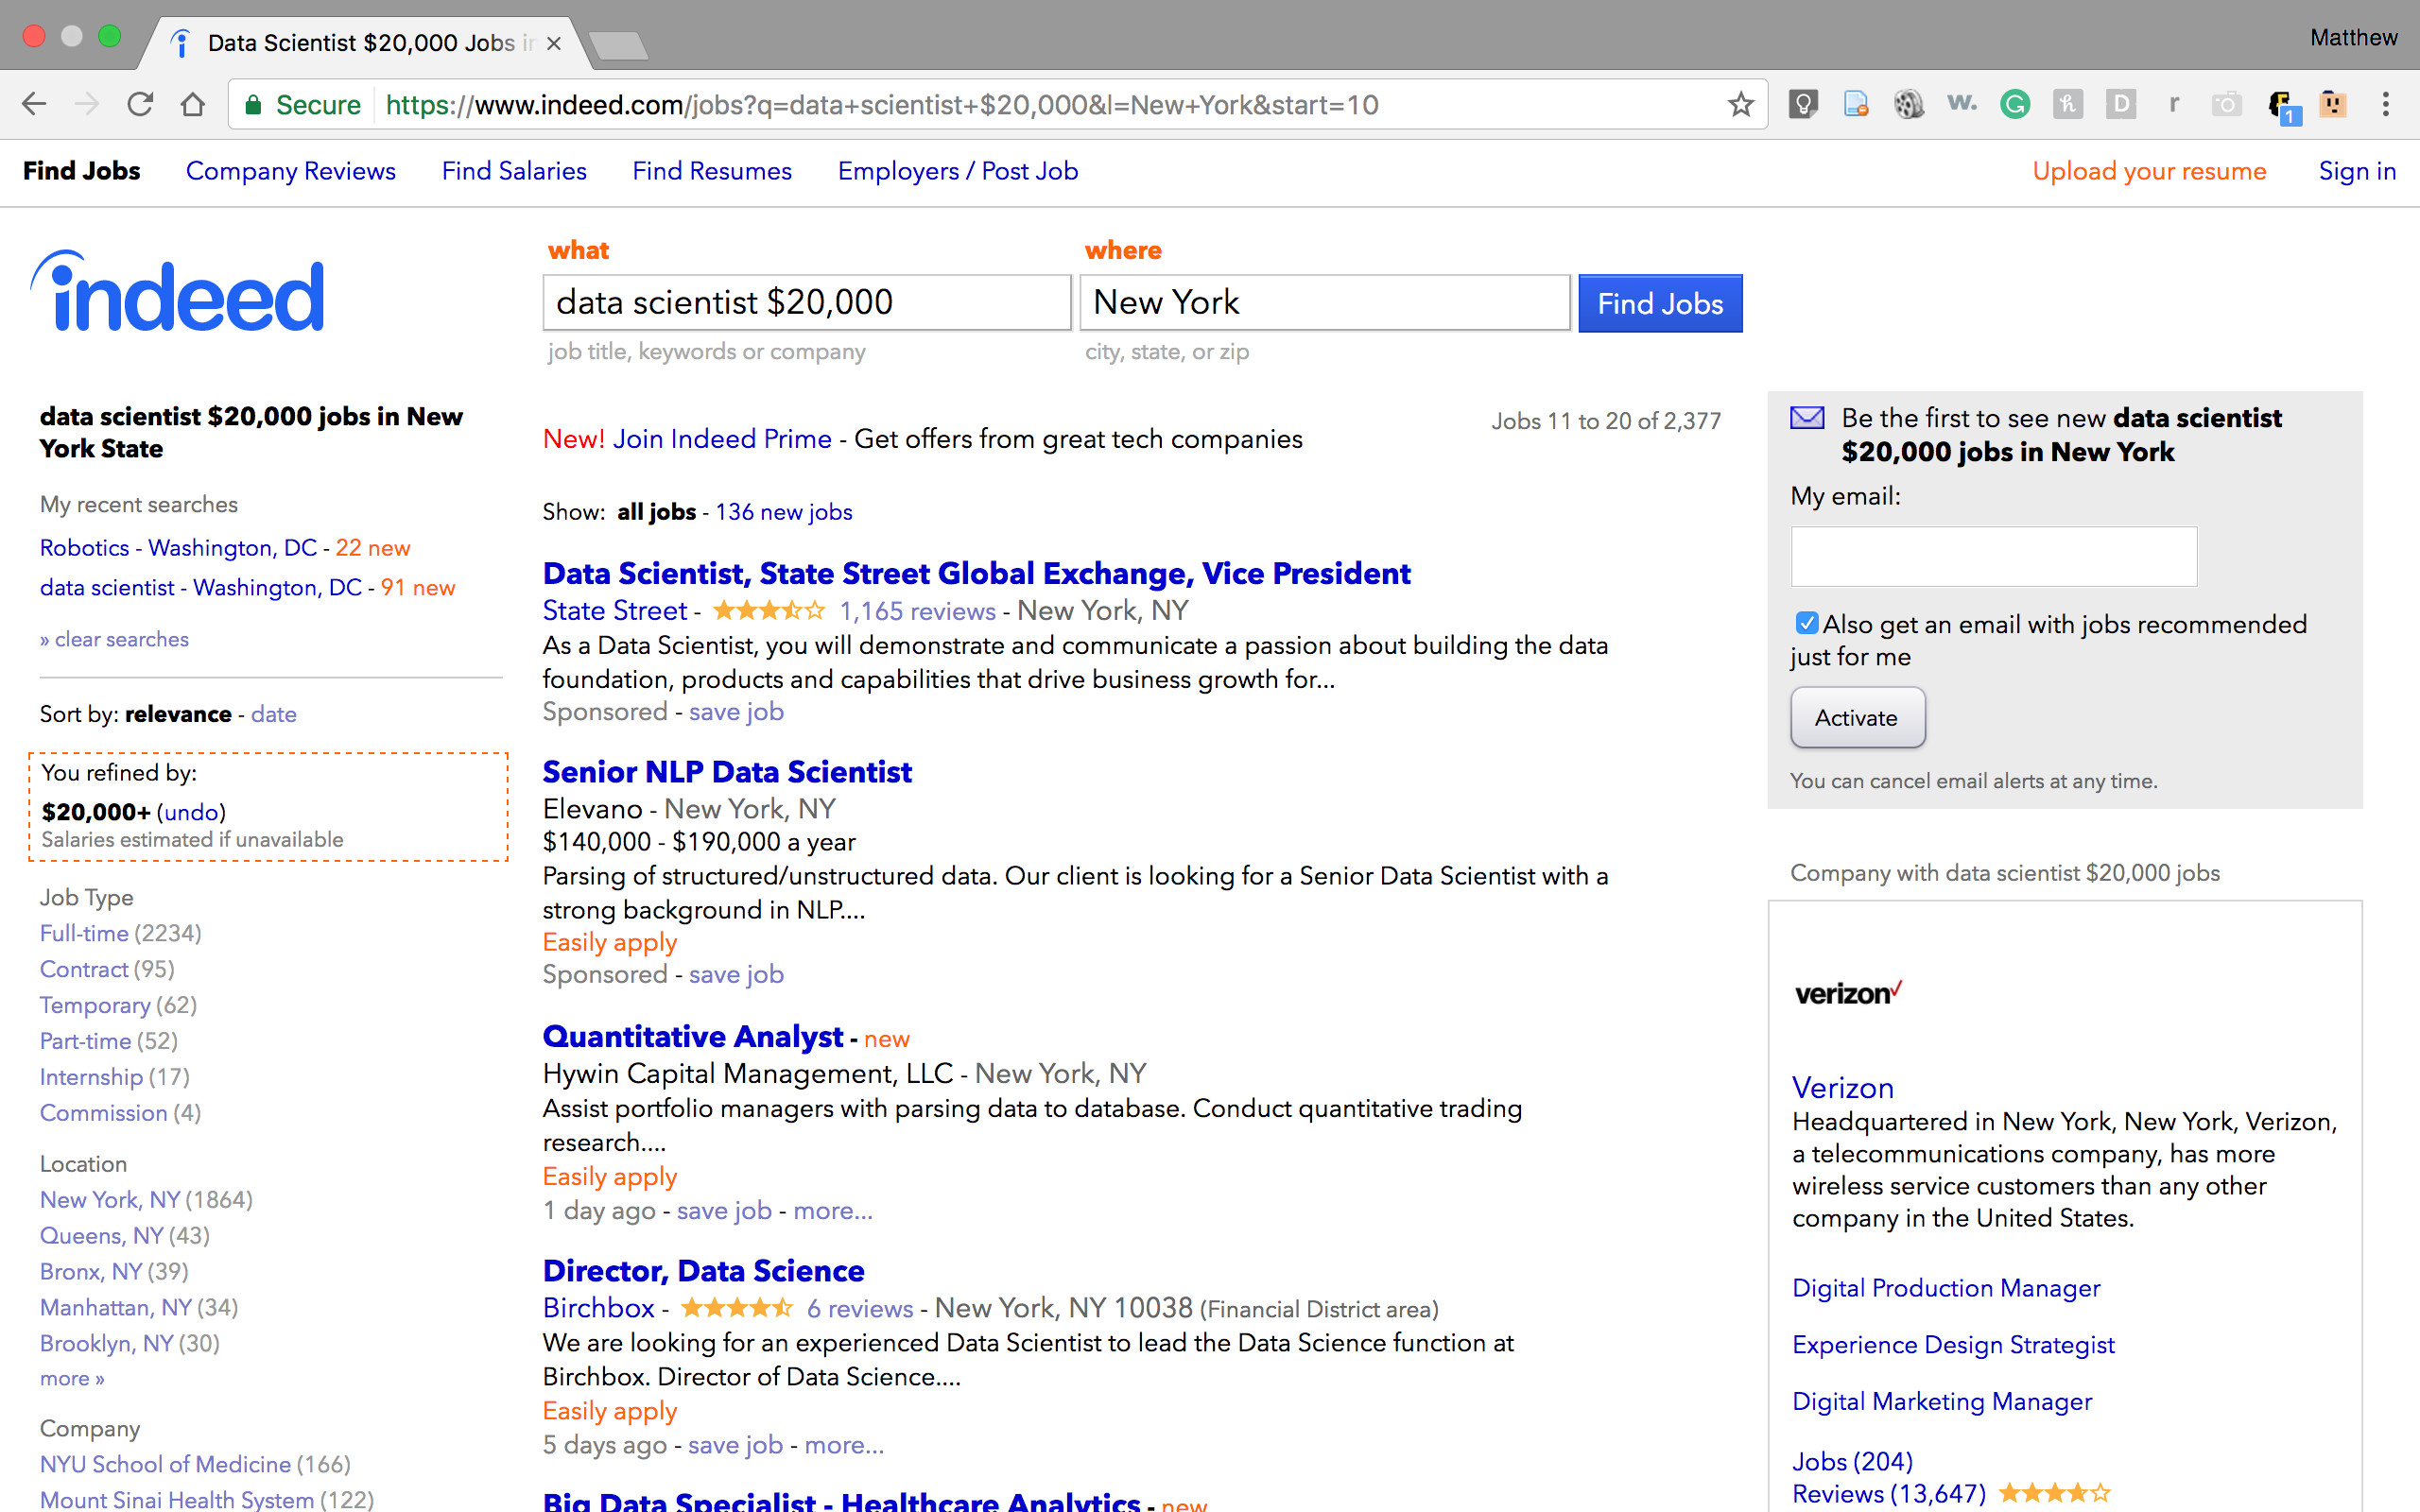

In [1]:
from IPython.display import Image
Image(filename='Images/indeed.png')

When scraping job listings, I wanted to get four different pieces of information on the job listings: The job title, the company, the location, and the salary. I wrote one function per piece of information, then combined them into one.

In [2]:
# Import necessary libraries
import bs4
from bs4 import BeautifulSoup
import urllib
import re

In [5]:
# Function to extract location from Indeed search result
def location_res(result):
    tag = result.find(name='span', attrs={'class':'location'}) #find appropriate tag
    try:
        if re.search("<",tag.renderContents()): #helps clean the data and only extract actual text instead of html code
            return tag.find(name='span', attrs={'itemprop':'addressLocality'}).renderContents()
        else:
            return entry.renderContents()
    except:
        return 'NaN'

In [6]:
# Function to extract company name from Indeed search result
def company_res(result):
    tag = result.find(name='span', attrs={'itemprop':'name'}) #find appropriate tag
    try: #First try statement accounts for whether there is any company at all
        try: #Second try statement accounts for whether there any nested tags
            return tag.find('a').renderContents()
        except:
            return tag.renderContents()
    except:
        return 'NaN'

In [7]:
# Function to extract job title
def job_res(result):
    try: #Accounts for missing job title
        tag = result.find(name='a', attrs={'data-tn-element':'jobTitle'})
        return tag.renderContents()
    except:
        return 'NaN'

In [8]:
# Function to extract salary
def salary_res(result):
    tag = result.find(name='td', attrs={'class':'snip'})
    tag2 = tag.find('nobr')
    try: # Try statement is especially important for this function since most results don't have a salary
        return tag2.renderContents()
    except:
        return 'NaN'

In [9]:
# This function iterates through each result on a single Indeed.com results page then applies the four functions
# above to extract the relevant information. It takes a search argument in order to also keep track of the search
# term used, since location can give a different value than the actual city or location searched.
def all_funcs(search):
    entries=[]
    for result in soup.find_all(name='div', attrs={'class':' row result'}):
        result_data=[]
        result_data.append(job_res(result))
        result_data.append(company_res(result))
        result_data.append(location_res(result))
        result_data.append(salary_res(result))
        result_data.append(search)
        entries.append(result_data)
    return entries

Below, I iterate through a list of cities and search for data science jobs with salaries above $20,000. After each city is done, the program will output the elapsed time so the user can keep track of how far along the scraper is.

In [12]:
import pandas as pd
from time import sleep
import datetime

In [52]:
max_results_per_city = 3000
results = [] #Empty list that will contain all results
a = datetime.datetime.now() # Start time of process
print a
city_list = ['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 
    'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh', 
    'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami', 'Washington%2C+DC', 
    'Baltimore', 'El+Paso', 'Boston','Bethesda%2C+MD','Morrisville%2C+NC',
    'Palo+Alto%2C+CA','Redmond%2C+WA','Mountain+View%2C+CA','El+Segundo%2C+CA',
    'Herndon%2C+VA','Menlo+Park%2C+CA', 'Collegeville%2C+PA','Roseland%2C+NJ',
    'Princeton%2C+NJ','St.+Louis%2C+MO', 'Tampa%2C+FL','Cambridge%2C+MA',
    'Stamford%2C+CT','Santa+Clara%2C+CA','Detroit', 'Ann+Arbor%2C+MI', 
    'Des+Moines%2C+IA', 'Minneapolis%2C+MN','New+Orleans']

for city in city_list: # Iterate through cities
    for start in range(0, max_results_per_city, 10): #Iterate through results pages
        url="http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=" + city + "&start=" + str(start)
        html = urllib.urlopen(url).read()
        soup = BeautifulSoup(html, 'html.parser', from_encoding="utf-8")
        data = all_funcs(city) #use functions from before to extract all job listing info
        for i in range(len(data)): #add info to results list
            results.append(data[i])
        sleep(1)
    print city + " DONE"
    print "Elapsed time: " + str(datetime.datetime.now() - a) #Update user on progress
        
b = datetime.datetime.now()
c = b - a
print c

#Turn results list into dataframe
df = pd.DataFrame(results,columns=['Job Title','Company','Location','Salary','Search Term'])

df.to_csv('FILEPATH/FILENAME.csv') #Save data

del results #Remove results list from memory

2017-04-11 23:43:35.312408
Bethesda%2C+MD DONE
2017-04-11 23:50:22.142442 0:06:46.830191
Morrisville%2C+NC DONE
2017-04-11 23:56:46.531761 0:13:11.219413
Palo+Alto%2C+CA DONE
2017-04-12 00:03:40.606056 0:20:05.293708
Redmond%2C+WA DONE
2017-04-12 00:10:35.961321 0:27:00.649018
Mountain+View%2C+CA DONE
2017-04-12 00:17:45.693266 0:34:10.380940
El+Segundo%2C+CA DONE
2017-04-12 00:24:42.294780 0:41:06.983958
Herndon%2C+VA DONE
2017-04-12 00:31:36.120337 0:48:00.807994
Menlo+Park%2C+CA DONE
2017-04-12 00:38:50.463017 0:55:15.150910
Collegeville%2C+PA DONE
2017-04-12 00:45:59.129439 1:02:23.817304
Roseland%2C+NJ DONE
2017-04-12 00:53:01.092451 1:09:25.780103
Princeton%2C+NJ DONE
2017-04-12 00:59:42.040190 1:16:06.727843
St.+Louis%2C+MO DONE
2017-04-12 01:06:21.505255 1:22:46.192909
Tampa%2C+FL DONE
2017-04-12 01:13:21.407556 1:29:46.095421
Cambridge%2C+MA DONE
2017-04-12 01:20:17.836725 1:36:42.524396
Stamford%2C+CT DONE
2017-04-12 01:27:10.784225 1:43:35.471877
Santa+Clara%2C+CA DONE
2017-

## Predicting salaries using Random Forests + Another Classifier

Here I'm loading in several csvs of data I scraped over the course of three days. I ran this program several times, expanding the list of cities and changing the maximum number of results. I never took any cities off the list, even though this meant that numerous duplicates showed up. My thinking behind this was that I'd like to catch as many job listings as possible, so if some more went up in certain cities, I could catch those, and remove the duplicates later on, which I did.

In [54]:
# df1 = pd.read_csv('/Users/mjspeck/Desktop/Indeed_data/overnight_monday.csv')
# df2 = pd.read_csv('/Users/mjspeck/Desktop/Indeed_data/tues_morn_20.csv')
# df3 = pd.read_csv('/Users/mjspeck/Desktop/Indeed_data/tues_morn_class.csv')
# df4 = pd.read_csv('/Users/mjspeck/Desktop/Indeed_data/second_major_run.csv')
# df5 = pd.read_csv('/Users/mjspeck/Desktop/Indeed_data/tues_overnight_run.csv')
# df6 = pd.read_csv('/Users/mjspeck/Desktop/Indeed_data/first_run.csv')

In [65]:
master_df = pd.concat([df1, df2, df3, df4, df5, df6])

In [68]:
master_df.drop('Unnamed: 0',axis=1,inplace=True) #Every time a df is saved to a csv, it creates an unnamed column

In [72]:
master_df.drop_duplicates(inplace=True) #This dropped LOTS of duplicates

Since the purpose of this project was to calculate the median salary of a data scientist and then use NLP to predict whether a given job listing would offer a salary above or below the median, any listing without a salary had to be dropped. It was a shame since at least 90% of the job listings did not contain salary information.

In [91]:
# Create df containing only observations that had a salary value
df_salary = pd.DataFrame(master_df[master_df.Salary.isnull() == False])

In [100]:
df_salary.Company.replace(to_replace='\n', value='',inplace=True, regex=True) #Remove useless characters

In [106]:
df_salary['Job Title'].replace(to_replace=['<b>','</b>'], value='', inplace=True, regex=True) #Remove useless characters

In [121]:
# More characters to remove
df_salary['Search Term'].replace(to_replace='\+', value = ' ', inplace=True, regex=True)
df_salary['Search Term'].replace(to_replace='\%2C', value = ',', inplace=True, regex=True)

In [131]:
# Removing all characters between and including < >
df_salary['Location'].replace(to_replace='<.*?>',value = '', inplace=True, regex=True)

In [134]:
#Let's see how the clean data looks
df_salary.head()

,Job Title,Company,Location,Salary,Search Term
0,Data Scientist,Platinum Solutions,"Houston, TX","$80,000 - $120,000 a year",Houston
17,Bioinformatics Software Developer,Genialis,"Houston, TX","$50,000 - $80,000 a year",Houston
19,Data Scientist,Engage Partners,"Houston, TX",$120 an hour,Houston
22,Quality Assurance Analyst (Research),Baylor College of Medicine,"Houston, TX","$43,794 a year",Houston
32,Flow Cytometry Specialist I,Baylor College of Medicine,"Houston, TX","$46,831 a year",Houston


Here, even though I had already taken out all observations without a salary value, I had to cut down the data even further by removing entries with hourly wages instead of a salary.

In [136]:
# Remove all rows with hourly salary
df_salary_yearly = df_salary[df_salary.Salary.str.contains('hour',case=False) == False]

In [143]:
# Take dollar signs out 
df_salary_yearly['Salary'].replace(to_replace=['\$',',',' a year'], value='', inplace=True, regex=True)

In [145]:
df_salary_yearly.head(5)

,Job Title,Company,Location,Salary,Search Term
0,Data Scientist,Platinum Solutions,"Houston, TX",80000 - 120000,Houston
17,Bioinformatics Software Developer,Genialis,"Houston, TX",50000 - 80000,Houston
22,Quality Assurance Analyst (Research),Baylor College of Medicine,"Houston, TX",43794,Houston
32,Flow Cytometry Specialist I,Baylor College of Medicine,"Houston, TX",46831,Houston
52,Research Statistical Analyst -Bioinformatics &...,MD Anderson Cancer Center,"Houston, TX",66400 - 99600,Houston


Now that I had a cleaned up salary column, I had to deal with the salary ranges. To do this, I wrote two functions that could be applied to the salary column. One would take the lower value, the other would take the upper value. Then, I used the returned values from these functions to make two columns for the upper and lower values of the salary.

In [152]:
def split_func_lower(val):
    return val.split('-')[0]

In [153]:
def split_func_upper(val):
    val.split('-')
    try:
        return val.split('-')[1]
    except:
        return val.split('-')[0]

In [165]:
lower_col=df_salary_yearly.Salary.apply(split_func_lower)

In [161]:
upper_col = df_salary_yearly.Salary.apply(split_func_upper)

In [177]:
#Everything looks good
df_salary_yearly.head()

,Job Title,Company,Location,Salary,Search Term,lower_sal_val,upper_sal_val
0,Data Scientist,Platinum Solutions,"Houston, TX",80000 - 120000,Houston,80000,120000
17,Bioinformatics Software Developer,Genialis,"Houston, TX",50000 - 80000,Houston,50000,80000
22,Quality Assurance Analyst (Research),Baylor College of Medicine,"Houston, TX",43794,Houston,43794,43794
32,Flow Cytometry Specialist I,Baylor College of Medicine,"Houston, TX",46831,Houston,46831,46831
52,Research Statistical Analyst -Bioinformatics &...,MD Anderson Cancer Center,"Houston, TX",66400 - 99600,Houston,66400,99600


In [178]:
#Removing spaces so that column dtypes will be ints
df_salary_yearly['lower_sal_val'].replace(to_replace=' ', value='', inplace=True, regex=True)
df_salary_yearly['upper_sal_val'].replace(to_replace=' ', value='', inplace=True, regex=True)

In [179]:
df_salary_yearly.dtypes

Job Title        object
Company          object
Location         object
Salary           object
Search Term      object
lower_sal_val    object
upper_sal_val    object
dtype: object

Here I realized that I had not accounted for monthly or weekly salaries, so I filtered those observations out as well.

In [188]:
#Also did this for 'month' and 'week'
#df_salary_yearly = df_salary_yearly[df_salary_yearly.Salary.str.contains('day',case=False) == False]

In [189]:
df_salary_yearly[['lower_sal_val','upper_sal_val']] = df_salary_yearly[['lower_sal_val','upper_sal_val']].astype(int)

In [300]:
df_salary_yearly.head(10)

,Job Title,Company,Location,Salary,Search Term,lower_sal_val,upper_sal_val,mean salary,median_bool,60_perc_bool,70_perc_bool,75_perc_bool,90_perc_bool,state
0,Data Scientist,Platinum Solutions,"Houston, TX",80000 - 120000,Houston,80000,120000,100000.0,False,False,False,False,False,'TX'
17,Bioinformatics Software Developer,Genialis,"Houston, TX",50000 - 80000,Houston,50000,80000,65000.0,False,False,False,False,False,'TX'
22,Quality Assurance Analyst (Research),Baylor College of Medicine,"Houston, TX",43794,Houston,43794,43794,43794.0,False,False,False,False,False,'TX'
32,Flow Cytometry Specialist I,Baylor College of Medicine,"Houston, TX",46831,Houston,46831,46831,46831.0,False,False,False,False,False,'TX'
52,Research Statistical Analyst -Bioinformatics &...,MD Anderson Cancer Center,"Houston, TX",66400 - 99600,Houston,66400,99600,83000.0,False,False,False,False,False,'TX'
148,Data Architect,Career Evolutions,"Phoenix, AZ",150000,Phoenix,150000,150000,150000.0,True,True,True,True,False,'AZ'
168,RESEARCH AND STATISTICAL ANALYST,Arizona Health Care Cost Containment S...,"Phoenix, AZ",39983 - 55500,Phoenix,39983,55500,47741.5,False,False,False,False,False,'AZ'
181,AIR QUALITY PLANNER 2-3,State of Arizona,"Phoenix, AZ",45000 - 77000,Phoenix,45000,77000,61000.0,False,False,False,False,False,'AZ'
191,Paralegal,"Emord &amp; Associates, P.C.","Gilbert, AZ 85295",45000 - 55000,Phoenix,45000,55000,50000.0,False,False,False,False,False,'AZ'
198,ENVIRONMENTAL SCIENTIST - EMISSIONS,State of Arizona,"Phoenix, AZ",49000 - 61000,Phoenix,49000,61000,55000.0,False,False,False,False,False,'AZ'


In [192]:
df_salary_yearly['mean salary'] = 0.5*df_salary_yearly.lower_sal_val + 0.5*df_salary_yearly.upper_sal_val

In [195]:
import numpy as np

In [196]:
np.median(df_salary_yearly['mean salary'])

108607.5

In [198]:
#Function to return median salary boolean
def above_median(val):
    if val > np.median(df_salary_yearly['mean salary']):
        return True
    else:
        return False

In [199]:
df_salary_yearly['median_bool'] = df_salary_yearly['mean salary'].apply(above_median)

In [202]:
df_salary_yearly.to_csv('clean_data.csv')

In [209]:
q_list=[60,70,75]

In [210]:
np.percentile(df_salary_yearly['mean salary'],q=c)

140000.0

I decided to create a number of columns with boolean values, classifying a given job listing as offering a salary above a certain percentile of the population.

In [224]:
def above_percentile(val):
    if val > np.percentile(df_salary_yearly['mean salary'],q=90):
        return True
    else:
        return False

In [225]:
df_salary_yearly['90_perc_bool'] = df_salary_yearly['mean salary'].apply(above_percentile)

In [246]:
df_salary_yearly.head(5)

,Job Title,Company,Location,Salary,Search Term,lower_sal_val,upper_sal_val,mean salary,median_bool,60_perc_bool,70_perc_bool,75_perc_bool,90_perc_bool,state
0,Data Scientist,Platinum Solutions,"Houston, TX",80000 - 120000,Houston,80000,120000,100000.0,False,False,False,False,False,[TX]
17,Bioinformatics Software Developer,Genialis,"Houston, TX",50000 - 80000,Houston,50000,80000,65000.0,False,False,False,False,False,[TX]
22,Quality Assurance Analyst (Research),Baylor College of Medicine,"Houston, TX",43794,Houston,43794,43794,43794.0,False,False,False,False,False,[TX]
32,Flow Cytometry Specialist I,Baylor College of Medicine,"Houston, TX",46831,Houston,46831,46831,46831.0,False,False,False,False,False,[TX]
52,Research Statistical Analyst -Bioinformatics &...,MD Anderson Cancer Center,"Houston, TX",66400 - 99600,Houston,66400,99600,83000.0,False,False,False,False,False,[TX]


In [238]:
#Extract states
df_salary_yearly['state'] = df_salary_yearly.Location.str.findall('[A-Z]{2}')

In [288]:
#The extracted values are lists, so here I turn them into strings.
df_salary_yearly['state'] = df_salary_yearly['state'].astype(str)

In [289]:
#Remove brackets from states
df_salary_yearly['state'].replace(to_replace=['\[','\]'], value='',inplace=True,regex=True)

In [290]:
df_salary_yearly.head(10)

,Job Title,Company,Location,Salary,Search Term,lower_sal_val,upper_sal_val,mean salary,median_bool,60_perc_bool,70_perc_bool,75_perc_bool,90_perc_bool,state
0,Data Scientist,Platinum Solutions,"Houston, TX",80000 - 120000,Houston,80000,120000,100000.0,False,False,False,False,False,'TX'
17,Bioinformatics Software Developer,Genialis,"Houston, TX",50000 - 80000,Houston,50000,80000,65000.0,False,False,False,False,False,'TX'
22,Quality Assurance Analyst (Research),Baylor College of Medicine,"Houston, TX",43794,Houston,43794,43794,43794.0,False,False,False,False,False,'TX'
32,Flow Cytometry Specialist I,Baylor College of Medicine,"Houston, TX",46831,Houston,46831,46831,46831.0,False,False,False,False,False,'TX'
52,Research Statistical Analyst -Bioinformatics &...,MD Anderson Cancer Center,"Houston, TX",66400 - 99600,Houston,66400,99600,83000.0,False,False,False,False,False,'TX'
148,Data Architect,Career Evolutions,"Phoenix, AZ",150000,Phoenix,150000,150000,150000.0,True,True,True,True,False,'AZ'
168,RESEARCH AND STATISTICAL ANALYST,Arizona Health Care Cost Containment S...,"Phoenix, AZ",39983 - 55500,Phoenix,39983,55500,47741.5,False,False,False,False,False,'AZ'
181,AIR QUALITY PLANNER 2-3,State of Arizona,"Phoenix, AZ",45000 - 77000,Phoenix,45000,77000,61000.0,False,False,False,False,False,'AZ'
191,Paralegal,"Emord &amp; Associates, P.C.","Gilbert, AZ 85295",45000 - 55000,Phoenix,45000,55000,50000.0,False,False,False,False,False,'AZ'
198,ENVIRONMENTAL SCIENTIST - EMISSIONS,State of Arizona,"Phoenix, AZ",49000 - 61000,Phoenix,49000,61000,55000.0,False,False,False,False,False,'AZ'


In [261]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

In [361]:
#Resetting indeces since they are the indeces from the original 10,000+ observation dataset
df_salary_yearly.reset_index(drop=True,inplace=True)

In [362]:
#Do two models: predict using Search Term, and using State

from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(df_salary_yearly['median_bool'])
X = pd.get_dummies(df_salary_yearly['Search Term'],drop_first=True)

In [413]:
#Here I'm testing out a model using just the search term as the X variable
clf=RandomForestClassifier(n_estimators=20, max_depth=20)
scores = cross_val_score(clf, X, y, cv=10)

In [414]:
print scores
print np.std(scores)
print np.mean(scores)

[ 0.68181818  0.45454545  0.39393939  0.24242424  0.35384615  0.671875
  0.3125      0.3125      0.40625     0.359375  ]
0.140262901274
0.418907342657


Not great scores

In [299]:
import seaborn as sns
import matplotlib.pyplot as plt

In [301]:
import patsy

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logreg_cv = LogisticRegressionCV(Cs=10, cv=10, penalty='l1', scoring='accuracy', solver='liblinear')
logreg_cv.fit(X_train, y_train)

print('best C for class:')
best_C = {logreg_cv.classes_[i]:x for i, (x, c) in enumerate(zip(logreg_cv.C_, logreg_cv.classes_))}
print(best_C)

best C for class:
{0: 0.35938136638046259}


In [370]:
scores_2 = cross_val_score(logreg_cv, X_train, y_train, cv=10)

In [398]:
print scores_2
print np.std(scores_2)
print np.mean(scores_2)

[ 0.56521739  0.58695652  0.65217391  0.60869565  0.55555556  0.57777778
  0.48888889  0.64444444  0.55555556  0.6       ]
0.0449770907428
0.583526570048


The Logistic Regression CV does better, but not by much. Here I decided to employ a count vectorizer in order to look at the words appearing in the job title.

In [322]:
#Import CV method
from sklearn.feature_extraction.text import CountVectorizer

In [372]:
cvec = CountVectorizer(stop_words='english')

# Fitting the vectorizer on our training data
cvec.fit(df_salary_yearly['Job Title'])

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [373]:
cvec_data = pd.DataFrame(cvec.transform(df_salary_yearly['Job Title']).todense(),
                       columns=cvec.get_feature_names())

In [375]:
cvec_data.head()

,000,01,04,10,10b,17096,1809,196,2017,500,...,visual,visualization,vp,waste,water,web,wellness,working,world,youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [331]:
word_counts = cvec_data.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

data            257
scientist       241
analyst         154
research        122
engineer         95
senior           92
learning         53
machine          51
software         34
manager          33
amp              32
quantitative     25
science          24
developer        24
statistical      23
sr               23
principal        20
analytics        19
lead             18
clinical         18
dtype: int64

In [381]:
print cvec_data.shape
print X2.shape

(649, 459)
(649, 24)


In [383]:
X2.head()

,'AZ','CA','CO','CT','DC','DE','FL','GA','IA','IL',...,'MN','MO','NC','NJ','NY','OR','PA','TX','VA','WA'
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [417]:
#Create an X matrix that has state dummy variables as well as CountVec vals
X_state = pd.concat([cvec_data, X2], axis=1, join_axes=[X_state.index])

In [418]:
X_state.shape

(649, 482)

In [415]:
X_search = pd.concat([cvec_data, X], axis=1, join_axes=[X.index])

In [416]:
X_search.shape

(649, 496)

In [420]:
#Do a test train split using cvec data as well as search term dummy variables
X_search_train, X_search_test, y_search_train, y_search_test = train_test_split(X_search, y, test_size=0.3)
logreg_cv = LogisticRegressionCV(Cs=10, cv=10, penalty='l1', scoring='accuracy', solver='liblinear')
logreg_cv.fit(X_search_train, y_search_train)

#take accuracy scores of fit
scores_search = cross_val_score(logreg_cv, X_search_test, y_search_test, cv=10)

In [421]:
print scores_search
print np.std(scores_search)
print np.mean(scores_search)

[ 0.82978723  0.73913043  0.86956522  0.71111111  0.84444444  0.86666667
  0.8         0.88888889  0.86666667  0.84444444]
0.0559258104138
0.826070510844


In [424]:
#Do the same thing, but use state instead of search term
X_state_train, X_state_test, y_state_train, y_state_test = train_test_split(X_state, y, test_size=0.3)
logreg_cv = LogisticRegressionCV(Cs=10, cv=10, penalty='l1', scoring='accuracy', solver='liblinear')
logreg_cv.fit(X_state_train, y_state_train)

scores_state = cross_val_score(logreg_cv, X_state_test, y_state_test, cv=10)

print scores_state
print np.std(scores_state)
print np.mean(scores_state)

[ 0.84782609  0.84782609  0.82608696  0.86956522  0.89130435  0.91304348
  0.88888889  0.82222222  0.77272727  0.68181818]
0.0642349086314
0.836130873957


In [439]:
clf=RandomForestClassifier(n_estimators=20, max_depth=20)
#clf_fit = clf.fit(X_search_train,y_search_train)
scores = cross_val_score(clf, X_search_test, y, cv=10)
print scores
print np.std(scores)
print np.mean(scores)

[ 0.87878788  0.77272727  0.81818182  0.86363636  0.76923077  0.921875
  0.828125    0.90625     0.796875    0.703125  ]
0.064736306181
0.825881410256


In [440]:
X_cvec_train, X_cvec_test, y_cvec_train, y_cvec_test = train_test_split(cvec_data, y, test_size=0.3)

In [441]:
clf=RandomForestClassifier(n_estimators=20, max_depth=20)
#clf_fit = clf.fit(X_cvec_train, y_cvec_train)

In [447]:
scores = cross_val_score(clf, X_cvec_train, y_cvec_train,cv=10)
print scores
print np.std(scores)
print np.mean(scores)

[ 0.89130435  0.7826087   0.86956522  0.86956522  0.82608696  0.95652174
  0.86666667  0.88888889  0.79545455  0.79545455]
0.0514733922469
0.854211682038


In [448]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [452]:
clf=RandomForestClassifier(n_estimators=20, max_depth=20)
clf_fit = clf.fit(X_cvec_train, y_cvec_train)

In [453]:
predictions = cross_val_predict(clf_fit, cvec_test, y, cv=10)
accuracy = metrics.accuracy_score(y, predictions)

In [458]:
precision = metrics.precision_score(y, predictions)
sensitivity = metrics.recall_score(y, predictions)

In [459]:
# Accuracy of model
print "Accuracy: " + str(accuracy)
print "Precision: " + str(precision)
print "Sensitivity: " + str(sensitivity)

Accuracy: 0.875192604006
Precision: 0.885714285714
Sensitivity: 0.861111111111


Random Forest Classifiers are ensembles, making them less interpretable. However, we can look at the feature importances to get an idea of which words in the job titles best predict whether or not a listing will offer a salary above the median.

In [455]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = cvec_data.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
data,0.089219
scientist,0.068727
learning,0.065603
analyst,0.063372
research,0.059086


While it's good that we can see the most important words, we cannot see in which direction these words push the salary (ie. we don't know whether word data indicates a job is likely to have a higher or lower salary). In order to get some interpretive value from this model, I decided to take the fifty most important words and look at whether the median value of listings with that word in them were above the median of all the job listings.

In [483]:
important_features = feature_importances.head(50).index.tolist()

In [509]:
important_features_df = pd.DataFrame(feature_importances.head(50))

In [484]:
imp2 = []
for i in important_features:
    imp2.append(str(i))

In [485]:
print len(imp2)

50


In [493]:
#Create column with boolean values, representing whether word appears in job title
for i in imp2:
    df_salary_yearly[i + ' bool'] = df_salary_yearly['Job Title'].str.contains(i,case=False)

In [498]:
np.median(df_salary_yearly[df_salary_yearly['data bool'] == True]['mean salary'])

130000.0

In [503]:
word_medians = []
word_means = []
for i in imp2:
    word_medians.append(np.median(df_salary_yearly[df_salary_yearly[i + ' bool'] == True]['mean salary']))
    word_means.append(np.mean(df_salary_yearly[df_salary_yearly[i + ' bool'] == True]['mean salary']))

In [506]:
print len(word_medians)
print len(word_means)

50
50


In [513]:
print word_medians

[130000.0, 125000.0, 150000.0, 75000.0, 60000.0, 135000.0, 135000.0, 170000.0, 150000.0, 170000.0, 148750.0, 172500.0, 135000.0, 78790.5, 80000.0, 96250.0, 137500.0, 73570.5, 93664.0, 83421.5, 85000.0, 145000.0, 132500.0, 75557.5, 125000.0, 147500.0, 115000.0, 122500.0, 120000.0, 55000.0, 120000.0, 162500.0, 130000.0, 54095.5, 91740.5, 99624.75, 125000.0, 50000.0, 120000.0, 130000.0, 85000.0, 88746.5, 162500.0, 72500.0, 98750.0, 55000.0, 38400.0, 93750.0, 120000.0, 127500.0]


In [530]:
important_features_df['word medians'] = word_medians
important_features_df['word means'] = word_means

In [531]:
important_features_df.head()

,importance,word medians,word means
data,0.089219,130000.0,135788.343254
scientist,0.068727,125000.0,127673.600418
learning,0.065603,150000.0,149711.538462
analyst,0.063372,75000.0,85742.476510
research,0.059086,60000.0,72053.408730


In [533]:
np.median(df_salary_yearly['mean salary'])

108607.5

In [534]:
median_effect = []
for i in important_features_df['word medians']:
    if i > 108607.5:
        median_effect.append('+')
    else:
        median_effect.append('-')

In [535]:
len(median_effect)

50

In [536]:
important_features_df['word effect'] = median_effect

In [538]:
important_features_df.head(20)

,importance,word medians,word means,word effect
data,0.089219,130000.0,135788.343254,+
scientist,0.068727,125000.0,127673.600418,+
learning,0.065603,150000.0,149711.538462,+
analyst,0.063372,75000.0,85742.476510,-
research,0.059086,60000.0,72053.408730,-
engineer,0.046728,135000.0,137642.873684,+
senior,0.040906,135000.0,134602.788043,+
quantitative,0.036615,170000.0,164760.000000,+
machine,0.031660,150000.0,148725.490196,+
big,0.017574,170000.0,178333.333333,+
